In [1]:
import pandas as pd

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/''ml/machine-learning-databases/''wine/wine.data', header=None)

In [3]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
from sklearn.model_selection import train_test_split


In [5]:
X ,y = df_wine.iloc[:,1:].values, df_wine.iloc[:, 0].values


In [6]:
X_train,X_test, y_train, y_test = train_test_split(X, y , test_size =0.3, random_state =0, stratify =y)

In [7]:
from sklearn.preprocessing import StandardScaler


In [8]:
stdsc = StandardScaler()

In [9]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

##### l1 regularization - sparsity 
###### In Logistic Regrssion

In [10]:
from sklearn.linear_model import LogisticRegression

In [12]:
lr = LogisticRegression(penalty='l1', C = 1.0, solver ='saga')
lr.fit(X_train_std, y_train)

/usr/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print("traiing accuracy:", lr.score(X_train_std, y_train))

traiing accuracy: 1.0


In [14]:
print("testing accuracy", lr.score(X_test_std, y_test))

testing accuracy 1.0


In [15]:
lr.intercept_

array([ 0.42993177,  0.60078772, -1.03071948])

 One vs rest Approach is being used here sicne wine daaset is the multclas classifciaiton prbolem.
 
    

In [16]:
lr.coef_

array([[ 0.32467124,  0.        ,  0.        , -0.7528066 ,  0.        ,
         0.        ,  0.32689034,  0.        ,  0.        ,  0.        ,
         0.        ,  0.27447163,  0.99513546],
       [-1.27344557, -0.36751257, -0.91158933,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.1199126 ,
         0.47991767,  0.        , -1.40141599],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -2.05044524,  0.        ,  0.        ,  0.21176118,
        -0.62186632, -0.96449033,  0.        ]])

In [17]:
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The 

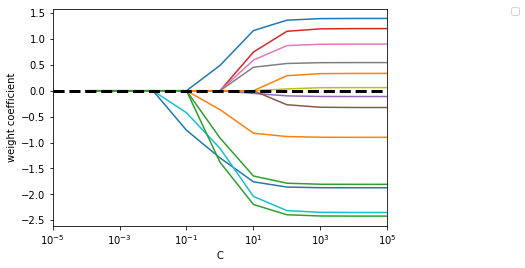

In [32]:
# showing parse solution from L1 regularization 

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan',
          'magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue',
          'gray', 'indigo', 'orange']


weights, params = [], []

for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', 
                            C=10.**c,random_state=0, solver ='saga')
    
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)


weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column]),
    label = df_wine.columns[column +1],
    color = color
    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')

ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

plt.show()

### Sequeential Feture Selection Algorithms

1. Feature Selection - selecting subset of riginal features
2. Feature Exraction - deriving new information from features

## Sequential Feature Selection - Sequential Backward Selection ALgorithm(SBS)

##### Reduces the dimensionalty of initial features subsapce with a minimm deacy in performance of the classifier to improve upon computational efficeicy.

The idea behind the SBS algorithm is quite simple: SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to define the criterion function J that we want to minimize. The criterion calculated by the criterion function can simply be the difference in performance of the classifier before and after the removal of a particular feature.

Algorithm 

1. Initialize the algorithm with k =d , where d is the dimensionalty of full feature space
2. Determine the features $x^-$ that maximizes the Criterion, $x^-$= argmax J($X_k$ - $x$)
3. Remove the feature $x^-$, from feature set, $X_{k-1} = X_k - x^{-} ; k = k-1$ 
4. terminate if k equal the number of desied features, otherwise go to step 2

In [34]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [59]:
class SBS():
    def __init__(self, estimator, k_features, scoring = accuracy_score, test_size=0.25, random_state =1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self,X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = self.test_size, random_state =self.random_state)
        
        dim = X_train.shape[1]
        self.indices = tuple(range(dim))
        self.subsets = [self.indices]
        score = self.cal_score(X_train, y_train, X_test, y_test, self.indices)
        
        self.scores = [score]
        
        
        while dim > self.k_features:
            scores = []
            
            subsets = []
            
            for p in combinations(self.indices, r = dim -1):
                score = self.cal_score(X_train, y_train,X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices = subsets[best]
            self.subsets.append(self.indices)
            dim -= 1
            
            self.scores.append(scores[best])
        self.k_score = self.scores[-1]
        
        return self
    
    
    
    def cal_score(self,X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
        

In [60]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier(n_neighbors=5)

In [62]:
sbs = SBS(knn, k_features=1)

In [63]:
sbs.fit(X_train_std, y_train)

In [65]:
k_feat = [len(k) for k in sbs.subsets]

Text(0.5, 0, 'Number of features')

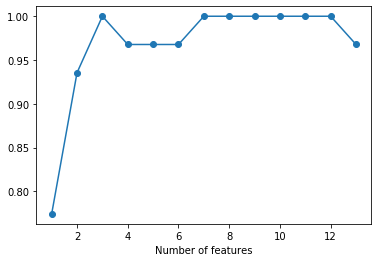

In [68]:
plt.plot(k_feat, sbs.scores, marker='o')
plt.xlabel('Number of features')

## Accessing Feature Importance wih randon Forest


In [70]:
from sklearn.ensemble import RandomForestClassifier


In [71]:
feat_labels = df_wine.columns[1:]

In [72]:
feat_labels

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')

In [73]:
forest = RandomForestClassifier(n_estimators=500, random_state=1)

In [74]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [75]:
importances = forest.feature_importances_

In [76]:
importances

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [77]:
indices = np.argsort(importances)[::-1]

In [78]:
indices

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2])

In [88]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f+1 ,30, feat_labels[indices[f]],
                           importances[indices[f]]))

 1) 13                             0.185453
 2) 7                              0.174751
 3) 10                             0.143920
 4) 12                             0.136162
 5) 1                              0.118529
 6) 11                             0.058739
 7) 6                              0.050872
 8) 5                              0.031357
 9) 2                              0.025648
10) 9                              0.025570
11) 4                              0.022366
12) 8                              0.013354
13) 3                              0.013279


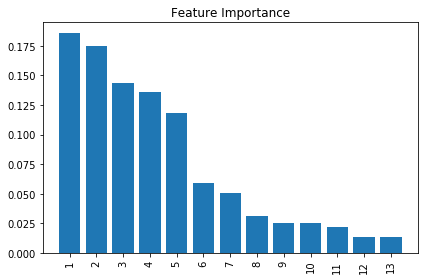

In [87]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')

plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [89]:
from sklearn.feature_selection import SelectFromModel

In [90]:
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

In [91]:
X_selected = sfm.transform(X_train)

In [94]:
print('Number of samples that meet this criterion:',X_selected.shape[0])

Number of samples that meet this criterion: 124


In [96]:
for f in range(X_selected.shape[1]):print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]],importances[indices[f]]))

 1) 13                             0.185453
 2) 7                              0.174751
 3) 10                             0.143920
 4) 12                             0.136162
 5) 1                              0.118529
